In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
infos = {
    'PS'     : {
        'color' : '#FF66FF',
        'orientation' : 'Esquerda',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido4_0.gif',
        'coordinates' : (-2.5, 3.1),
    },
    'PSD'    : {
        'color' : '#F68A21',
        'orientation' : 'Direita',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido3_1.gif',
        'coordinates' : (1.6, -1),
    },
    'BE'     : {
        'color' : '#D21F1B',
        'orientation' : 'Esquerda',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido14_0.gif',
        'coordinates' : (-3.5, 0.5),
    },
    'PCP'    : {
        'color' : '#FF0000',
        'orientation' : 'Esquerda',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido1_0.gif',
        'coordinates' : (-3.5, -4.7),
    },
    'CDS-PP' : {
        'color' : '#0091DC',
        'orientation' : 'Direita',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido2_0.gif',
        'coordinates' : (2.5, -2.1),
    },
    'PAN'    : {
        'color' : '#036A84',
        'orientation' : 'Esquerda',
        'url_image' : 'http://www.cne.pt/sites/default/files/pan_2014.jpg',
        'coordinates' : (-3.4, 3.2),
    },
    'PEV'    : {
        'color' : '#73BE43',
        'orientation' : 'Esquerda',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido10_0.gif',
        'coordinates' : (-2.1, -2.5),
    },
    'CH'     : {
        'color' : '#333399',
        'orientation' : 'Direita',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido_chega.png',
        'coordinates' : (5, -3.6),
    },
    'IL'     : {
        'color' : '#00AEEE',
        'orientation' : 'Direita',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido_liberal.png',
        'coordinates' : (1, 0.5) #???,
    },
    'JPP'    : {
        'color' : '#0E766D',
        'orientation' : 'Centro',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido_jpp.jpg',
        'coordinates' : (0, 0) #???,
    },
    'PPM'    : {
        'color' : '#014A94',
        'orientation' : 'Direita',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido5_0.gif',
        'coordinates' : (1.25, -2.1) #???,
    },
    'NC'     : {
        'color' : '#FEAB19',
        'orientation' : 'Direita',
        'url_image' : 'http://www.cne.pt/sites/default/files/partido_nos_cidadaos.jpg',
        'coordinates' : (0, 0.9) #???,
    },
    'L'      : {
        'color' : '#98C75A',
        'orientation' : 'Esquerda',
        'url_image' : 'http://www.cne.pt/sites/default/files/livre.png',
        'coordinates' : (-4.6, 2.7),
    },
}

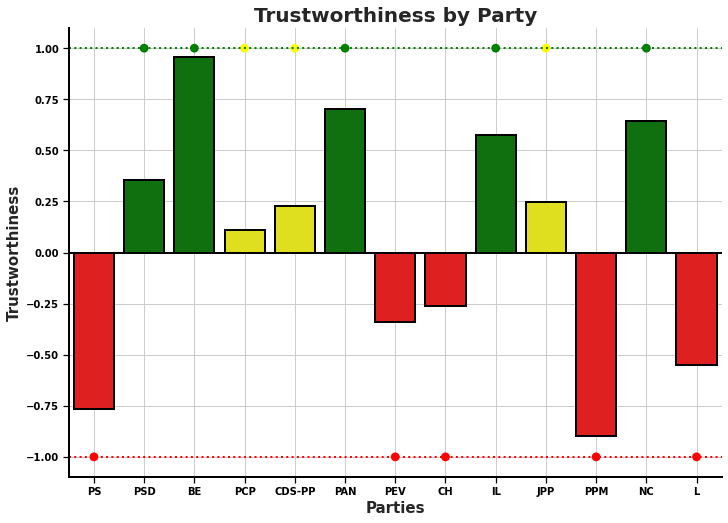

In [66]:
parties = ['PS', 'PSD', 'BE', 'PCP', 'CDS-PP', 'PAN', 'PEV', 'CH', 'IL', 'JPP', 'PPM', 'NC', 'L']
values = 2 * np.random.random(len(parties)) - 1
#values = [ 0.74536555,  0.08069495,  0.41672713, -0.62249645, -0.426146 , 0.9603421 ,  0.23687222,  0.26843376,  0.10092122, -0.74522682, -0.89277303, -0.55383809, -0.44626972]

df = pd.DataFrame({
    "Parties" : parties,
    "Trustworthiness"  : values,
})

df["Reability"] = df["Trustworthiness"] > 0

sns.set_theme(
    context='notebook',
    style="ticks")

a4_dims = (11.7, 8.27)

colors = {}

for i in range(len(parties)):
    if values[i] > 0.25:
        colors[parties[i]] = 'green'
    elif values[i] < -0.25:
        colors[parties[i]] = 'red'
    else:
        colors[parties[i]] = 'yellow'

fig, ax = plt.subplots(figsize=a4_dims)

sns.pointplot(x=list(range(len(parties))),
              y=[1 if x>0 else -1 for x in values],
              join=False, zorder=1,
              palette=[colors[key] for key in colors])

ax = sns.barplot(x="Parties", y="Trustworthiness", data=df,
                 palette=colors, ax=ax, edgecolor='black', linewidth=2)

#plt.xticks(rotation=0, fontsize="10", va="center")
ax.tick_params(axis='both', colors="black")
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.axhline(y= 0, color='black', linestyle='-', linewidth=2)
plt.axhline(y= 1, color='green', linestyle=':', linewidth=2)
plt.axhline(y=-1, color='red'  , linestyle=':', linewidth=2)
plt.grid()
plt.legend([],[], frameon=False)

for _,s in ax.spines.items():
    s.set_linewidth(2)
    s.set_color('black')

plt.xlabel('Parties', fontsize=15, fontweight='bold')
plt.ylabel('Trustworthiness', fontsize=15, fontweight='bold')

plt.title("Trustworthiness by Party", fontsize=20, fontweight='bold')

sns.despine()
plt.show()

In [71]:
df = pd.read_csv("dialog_lines_database_initiatives.csv")

df["Person"].loc[(df["Transcript"].str.contains("DAR-001")) & (df["Party"] == "PSD")].unique()

array(['Carlos Peixoto', 'António Ventura', 'Adão Silva',
       'Duarte Marques', 'Cláudia André', 'Sandra Pereira',
       'Ricardo Baptista Leite', 'Filipa Roseta', 'Mónica Quintela',
       'Alexandre Poço', 'Olga Silvestre'], dtype=object)

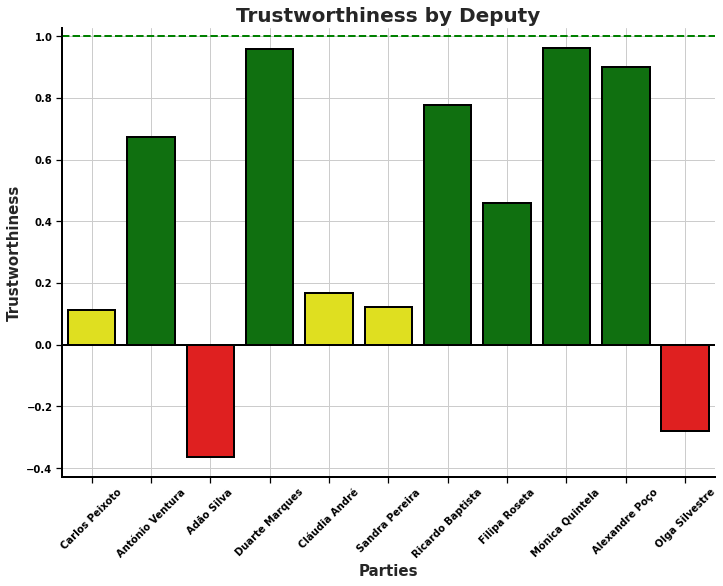

In [95]:
parties = ['Carlos Peixoto', 'António Ventura', 'Adão Silva',
       'Duarte Marques', 'Cláudia André', 'Sandra Pereira',
       'Ricardo Baptista', 'Filipa Roseta', 'Mónica Quintela',
       'Alexandre Poço', 'Olga Silvestre']
#values = 1.75 * np.random.random(len(parties)) - 0.75
values = [ 0.11238139,  0.67371451,  -0.36329231, 0.95858654, 0.16841599,  0.12345861,
        0.77623932,  0.46030573,  0.96110061,  0.89822816,
       -0.28003139]

df = pd.DataFrame({
    "Parties" : parties,
    "Trustworthiness"  : values,
})

df["Reability"] = df["Trustworthiness"] > 0

sns.set_theme(
    context='notebook',
    style="ticks")

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

colors = {}

for i in range(len(parties)):
    if values[i] > 0.25:
        colors[parties[i]] = 'green'
    elif values[i] < -0.25:
        colors[parties[i]] = 'red'
    else:
        colors[parties[i]] = 'yellow'

ax = sns.barplot(x="Parties", y="Trustworthiness", data=df,
                 palette=colors, ax=ax, edgecolor='black', linewidth=2)

ax.tick_params(axis='both', colors="black")
plt.xticks(fontsize=10, fontweight='bold', rotation=45)
plt.yticks(fontsize=10, fontweight='bold')
plt.axhline(y= 0, color='black', linestyle='-', linewidth=2)
plt.axhline(y= 1, color='green', linestyle='--', linewidth=2)

plt.grid()
plt.legend([],[], frameon=False)

for _,s in ax.spines.items():
    s.set_linewidth(2)
    s.set_color('black')

plt.xlabel('Parties', fontsize=15, fontweight='bold')
plt.ylabel('Trustworthiness', fontsize=15, fontweight='bold')

plt.title("Trustworthiness by Deputy", fontsize=20, fontweight='bold')

sns.despine()
plt.show()

In [133]:
years = ['2018', '2019', '2020', '2021']

dates = []

for year in years:
    for i in range(1, 13):
        if i < 10:
            dates.append("0" + '{}/{}'.format(i, year))
        else:
            dates.append('{}/{}'.format(i, year))

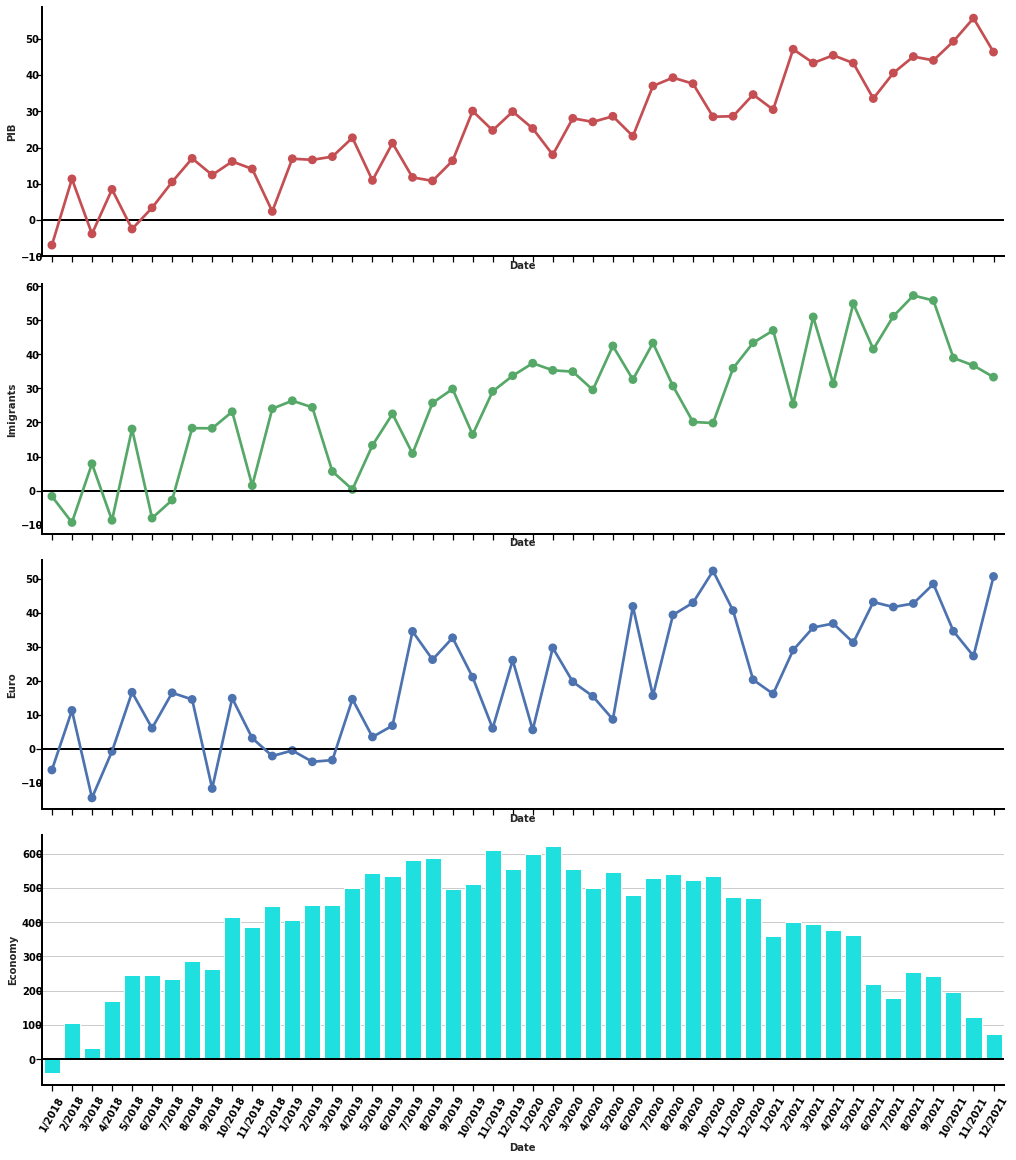

In [201]:
df = pd.DataFrame()

df['Date'] = dates
df["Date"] = df["Date"].apply(pd.to_datetime)
df["Date"] = [str(x.month) + "/" + str(x.year) for x in df["Date"]]

df["PIB"] = np.arange(len(dates)) + 20 * np.random.random(len(dates)) - 9
df["Minimum Salary"] = np.arange(len(dates)) + 10 * np.random.random(len(dates)) - 2
df["Euro"] = np.arange(len(dates)) + 40 * np.random.random(len(dates)) - 20
df["Imigrants"] = np.arange(len(dates)) + 30 * np.random.random(len(dates)) - 15
df['Economy'] = [int(-x**2 + 48 * x + 150 * np.random.random() - 80) for x in np.arange(len(dates))]


'''
df['Linear'] = 
df['Quadratic'] = 
df['Log'] = 
'''

a4_dims = (14, 16)
fig, ax = plt.subplots(figsize=a4_dims, nrows=4, ncols=1, sharex=True, constrained_layout=True)
sns.set_theme(
    context='notebook',
    style="ticks")

ax[0].tick_params(axis='both', colors="black")
ax[1].tick_params(axis='both', colors="black")
ax[2].tick_params(axis='both', colors="black")
ax[3].tick_params(axis='both', colors="black")

ax[0].set_xlabel('Date', fontweight='bold', fontsize=10)
ax[1].set_xlabel('Date', fontweight='bold', fontsize=10)
ax[2].set_xlabel('Date', fontweight='bold', fontsize=10)
ax[3].set_xlabel('Date', fontweight='bold', fontsize=10)

ax[0].set_ylabel('PIB', fontweight='bold', fontsize=10)
ax[1].set_ylabel('Imigrants', fontweight='bold', fontsize=10)
ax[2].set_ylabel('Euro', fontweight='bold', fontsize=10)
ax[3].set_ylabel('Economy', fontweight='bold', fontsize=10)

ax[0].tick_params(axis='both', colors="black")
ax[1].tick_params(axis='both', colors="black")
ax[2].tick_params(axis='both', colors="black")
ax[3].tick_params(axis='both', colors="black")

sns.despine()
plt.setp(ax[0].get_xticklabels(), fontsize=10, fontweight="bold", horizontalalignment="center")
plt.setp(ax[1].get_xticklabels(), fontsize=10, fontweight="bold", horizontalalignment="center")
plt.setp(ax[2].get_xticklabels(), fontsize=10, fontweight="bold", horizontalalignment="center")
plt.setp(ax[3].get_xticklabels(), fontsize=10, fontweight="bold", horizontalalignment="center")
plt.setp(ax[0].get_yticklabels(), fontsize=10, fontweight="bold", horizontalalignment="center")
plt.setp(ax[1].get_yticklabels(), fontsize=10, fontweight="bold", horizontalalignment="center")
plt.setp(ax[2].get_yticklabels(), fontsize=10, fontweight="bold", horizontalalignment="center")
plt.setp(ax[3].get_yticklabels(), fontsize=10, fontweight="bold", horizontalalignment="center")

ax[0].axhline(y= 0, color='black', linestyle='-', linewidth=2)
ax[1].axhline(y= 0, color='black', linestyle='-', linewidth=2)
ax[2].axhline(y= 0, color='black', linestyle='-', linewidth=2)
ax[3].axhline(y= 0, color='black', linestyle='-', linewidth=2)
plt.grid()

for i in range(4):
    for _,s in ax[i].spines.items():
        s.set_linewidth(2)
        s.set_color('black')

plt.xticks(rotation=60)
sns.pointplot(x='Date', y='PIB', data=df, color='r', ax=ax[0])
sns.pointplot(x='Date', y="Imigrants", data=df, color='g', ax=ax[1])
sns.pointplot(x='Date', y='Euro', data=df, color='b', ax=ax[2])
sns.barplot(x='Date', y='Economy', data=df, color='cyan', ax=ax[3])

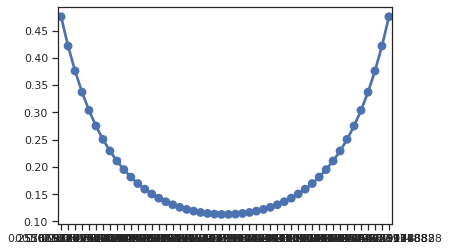

In [146]:
x = np.linspace(0, 12, num=len(dates))
mu = np.mean(x)
sigma = np.std(x)

y = np.divide(1, sigma * np.sqrt(2 * np.pi)) * np.exp(np.divide((x - mu)**2, 2 * (sigma ** 2) ))

sns.pointplot(x=x, y=y)

In [172]:
np.random.random()

0.3386345371977024